In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/credit_scoring/main/base_dados_traduzida.csv")

In [ ]:
data.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   default                      1000 non-null   int64 
 1   conta_corrente               1000 non-null   object
 2   prazo_emprestimo_meses       1000 non-null   int64 
 3   historico_credito            1000 non-null   object
 4   proposito_emprestimo         1000 non-null   object
 5   valor_emprestimo             1000 non-null   int64 
 6   reserva_cc                   1000 non-null   object
 7   tempo_emprego_atual          1000 non-null   object
 8   taxa_comp_salario            1000 non-null   int64 
 9   sexo_est_civil               1000 non-null   object
 10  outros_fiadores              1000 non-null   object
 11  anos_residencia_atual        1000 non-null   int64 
 12  propriedade                  1000 non-null   object
 13  idade                        1000 

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.isnull().sum()

default                        0
conta_corrente                 0
prazo_emprestimo_meses         0
historico_credito              0
proposito_emprestimo           0
valor_emprestimo               0
reserva_cc                     0
tempo_emprego_atual            0
taxa_comp_salario              0
sexo_est_civil                 0
outros_fiadores                0
anos_residencia_atual          0
propriedade                    0
idade                          0
outros_planos_financiamento    0
tipo_residencia                0
n_creditos_banco               0
status_emprego                 0
n_dependentes                  0
telefone                       0
trabalhador_estrangeiro        0
dtype: int64

In [ ]:
data['conta_corrente'].unique()

array(['< 0 DM', '0 <= ... < 200 DM', 'no checking account',
       '>= 200 DM / salary assignments for at least 1 year'], dtype=object)

In [ ]:
#transformando categorias de 'conta_corrente' em números

a = {
      '< 0 DM':1,
      '0 <= ... < 200 DM':2,
      'no checking account':3,
      '>= 200 DM / salary assignments for at least 1 year':4
}

data['conta_corrente'] = data['conta_corrente'].map(a)

In [ ]:
#transformando categorias em números utilizando Label Encoder

from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()
data['historico_credito'] = labelEncoder.fit_transform(data['historico_credito'])
data.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,1,6,1,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,2,48,3,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,3,12,1,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,1,42,3,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,1,24,2,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [ ]:
data.keys()

Index(['default', 'conta_corrente', 'prazo_emprestimo_meses',
       'historico_credito', 'proposito_emprestimo', 'valor_emprestimo',
       'reserva_cc', 'tempo_emprego_atual', 'taxa_comp_salario',
       'sexo_est_civil', 'outros_fiadores', 'anos_residencia_atual',
       'propriedade', 'idade', 'outros_planos_financiamento',
       'tipo_residencia', 'n_creditos_banco', 'status_emprego',
       'n_dependentes', 'telefone', 'trabalhador_estrangeiro'],
      dtype='object')

In [ ]:
data['outros_fiadores'].unique()

array(['none', 'guarantor', 'co-applicant'], dtype=object)

In [ ]:
data['proposito_emprestimo'] = labelEncoder.fit_transform(data['proposito_emprestimo'])
data['reserva_cc'] = labelEncoder.fit_transform(data['reserva_cc'])
data['tempo_emprego_atual'] = labelEncoder.fit_transform(data['tempo_emprego_atual'])
data['sexo_est_civil'] = labelEncoder.fit_transform(data['sexo_est_civil'])
data['outros_fiadores'] = labelEncoder.fit_transform(data['outros_fiadores'])
data['propriedade'] = labelEncoder.fit_transform(data['propriedade'])
data['outros_planos_financiamento'] = labelEncoder.fit_transform(data['outros_planos_financiamento'])
data['tipo_residencia'] = labelEncoder.fit_transform(data['tipo_residencia'])
data['status_emprego'] = labelEncoder.fit_transform(data['status_emprego'])
data['telefone'] = labelEncoder.fit_transform(data['telefone'])
data['trabalhador_estrangeiro'] = labelEncoder.fit_transform(data['trabalhador_estrangeiro'])

In [ ]:
x = data.drop('default', axis=1) #binaria (sim ou não)
y = data['default']

In [ ]:
from sklearn.model_selection import train_test_split

SEED = 100
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size = 0.3, random_state=SEED)

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(train_x, train_y)

print(model.score(train_x, train_y))

0.7557142857142857


In [ ]:
from sklearn.model_selection import cross_val_score

acuracias = cross_val_score(model, x, y, cv=5)
print(acuracias)

[0.745 0.745 0.75  0.74  0.72 ]


In [ ]:
from sklearn.model_selection import cross_validate
import numpy as np

nome_metricas = ['accuracy', 'precision_macro', 'recall_macro']
metricas = cross_validate(model, x, y, cv=5, scoring=nome_metricas)

for met in metricas:
    print(f"- {met}:")
    print(f"-- {metricas[met]}")
    print(f"-- {np.mean(metricas[met])} +- {np.std(metricas[met])}\n")  

- fit_time:
-- [0.13201213 0.15575933 0.14067912 0.17549634 0.05751109]
-- 0.1322916030883789 +- 0.0401993462909435

- score_time:
-- [0.00520515 0.00514221 0.00522709 0.00551653 0.00502896]
-- 0.005223989486694336 +- 0.00016165806447954628

- test_accuracy:
-- [0.745 0.745 0.75  0.74  0.72 ]
-- 0.74 +- 0.010488088481701525

- test_precision_macro:
-- [0.70141535 0.69731388 0.71205357 0.68685955 0.65594542]
-- 0.690717554778294 +- 0.019168544685138223

- test_recall_macro:
-- [0.63214286 0.64166667 0.63571429 0.64761905 0.61428571]
-- 0.6342857142857142 +- 0.01130388330520878



In [ ]:
#previsões

previsoes = model.predict(test_x)

In [ ]:
from sklearn.metrics import accuracy_score

#acuracia de teste
acuracia = accuracy_score(test_y, previsoes)
acuracia

0.7433333333333333

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


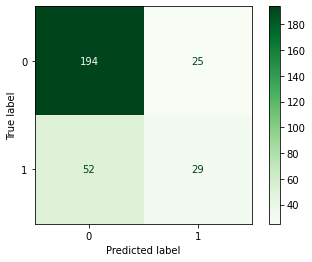

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

matriz_confusao = plot_confusion_matrix(model, test_x, test_y, cmap='Greens')
matriz_confusao

#mostra falsos positivos/negativos e acertos

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(test_y, previsoes))

              precision    recall  f1-score   support

           0       0.79      0.89      0.83       219
           1       0.54      0.36      0.43        81

    accuracy                           0.74       300
   macro avg       0.66      0.62      0.63       300
weighted avg       0.72      0.74      0.73       300



In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

prob_previsao = model.predict_proba(test_x)[:,1]
prob_previsao #probabilidade da previsão ser 1 ou 0

#tfp = taxa de falsos positivos
#tvp = taxa de verdadeiros positivos

array([0.245959  , 0.6206535 , 0.2899083 , 0.12279419, 0.27643371,
       0.25995779, 0.06054549, 0.23737498, 0.10371563, 0.30140027,
       0.15300551, 0.84384727, 0.30878517, 0.62702186, 0.70378489,
       0.63668499, 0.23366183, 0.30128096, 0.47734707, 0.06781405,
       0.06846807, 0.57009568, 0.49410926, 0.83296558, 0.72471265,
       0.62646539, 0.08539736, 0.1359772 , 0.06901801, 0.20963402,
       0.1669712 , 0.15095753, 0.31935231, 0.28835911, 0.14151483,
       0.54305568, 0.57011753, 0.15697343, 0.26296107, 0.30755627,
       0.17598958, 0.40963197, 0.59683148, 0.15492243, 0.12189862,
       0.50927797, 0.28355774, 0.33429096, 0.4145276 , 0.25385423,
       0.2360938 , 0.56703549, 0.75196408, 0.27764357, 0.15831095,
       0.45225666, 0.66682645, 0.47120347, 0.46187594, 0.08418237,
       0.10540999, 0.05508894, 0.10440648, 0.02612438, 0.16780705,
       0.35013838, 0.09385873, 0.20281784, 0.14947319, 0.03056798,
       0.29700322, 0.43428265, 0.61836682, 0.13086952, 0.21794

0.7137944641749816


Text(0, 0.5, 'Sensibilidade')

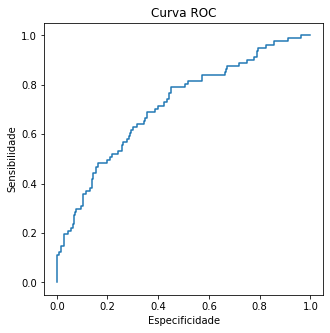

In [ ]:
tfp, tvp, limite = roc_curve(test_y, prob_previsao) #desenha curva
print(roc_auc_score(test_y, prob_previsao)) #calcula area da curva através de integral

plt.subplots(1, figsize=(5,5))
plt.title('Curva ROC')
plt.plot(tfp, tvp)
plt.xlabel('Especificidade')
plt.ylabel('Sensibilidade')

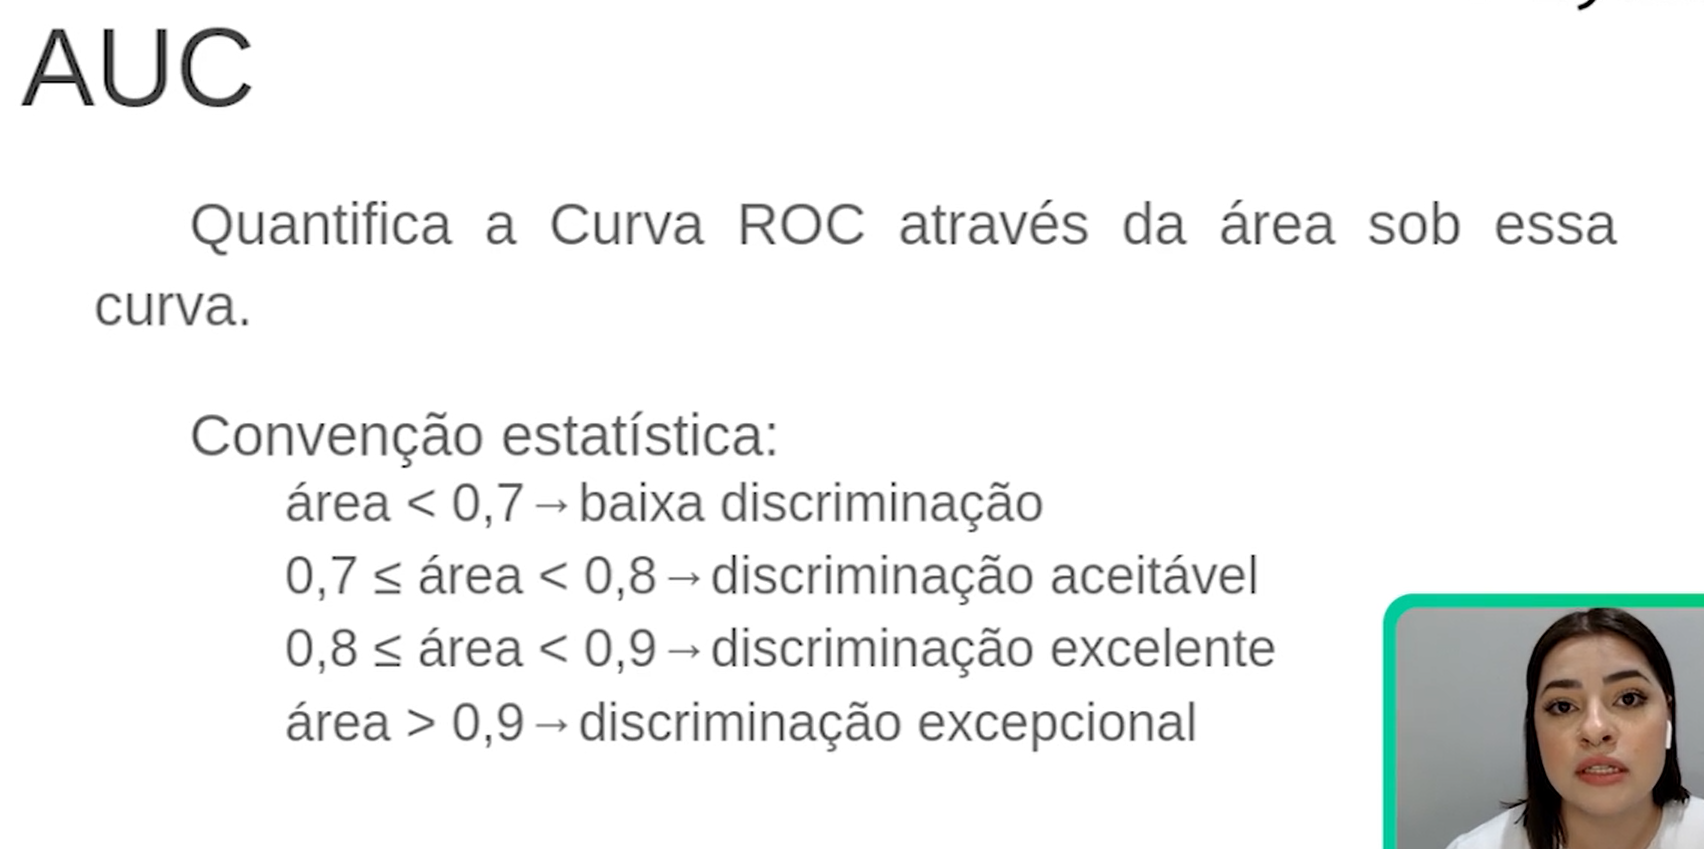

In [ ]:
variaveis_analise = ['sexo_est_civil', 'idade', 'prazo_emprestimo_meses', 'valor_emprestimo', 'default']
data[variaveis_analise].describe()

,sexo_est_civil,idade,prazo_emprestimo_meses,valor_emprestimo,default
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.878000,35.546000,20.903000,3271.258000,0.300000
std,1.350904,11.375469,12.058814,2822.736876,0.458487
min,0.000000,19.000000,4.000000,250.000000,0.000000
25%,0.000000,27.000000,12.000000,1365.500000,0.000000
50%,3.000000,33.000000,18.000000,2319.500000,0.000000
75%,3.000000,42.000000,24.000000,3972.250000,1.000000
max,3.000000,75.000000,72.000000,18424.000000,1.000000


In [ ]:
data['sexo_est_civil'].value_counts()

3    548
0    310
2     92
1     50
Name: sexo_est_civil, dtype: int64

In [ ]:
data['default'].value_counts()

#0 são créditos negadose 1 aprovados
#nega muito mais crédito do que concede, base desbalanceada

0    700
1    300
Name: default, dtype: int64

In [ ]:
import seaborn as sns

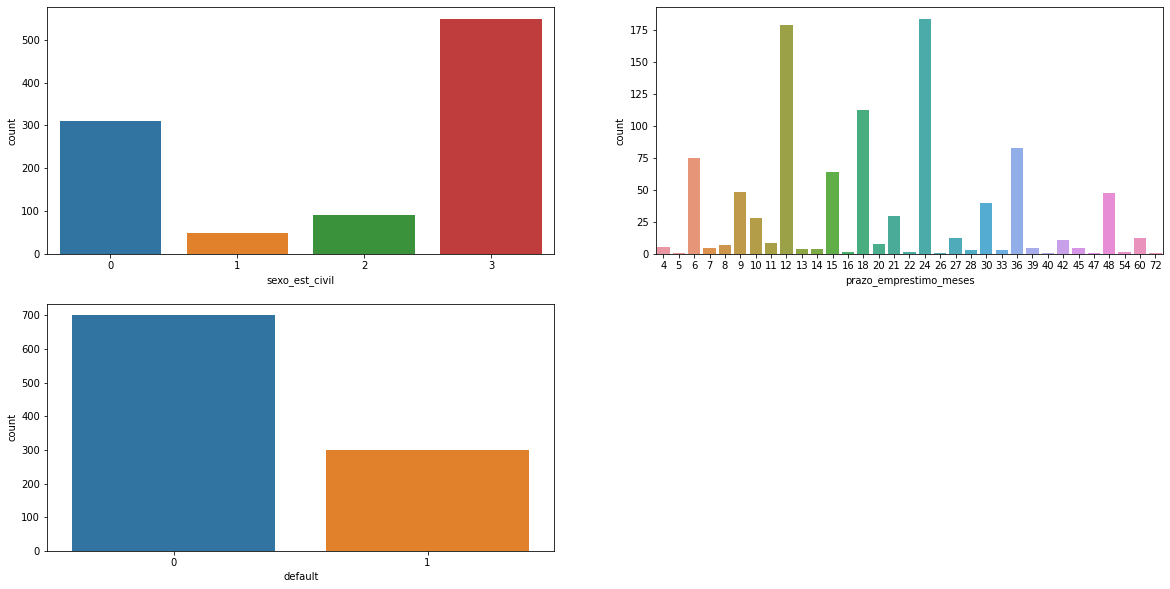

In [ ]:
histogramas = ['sexo_est_civil','prazo_emprestimo_meses', 'default']

lista_hists = list(enumerate(histogramas))

plt.figure(figsize=(20,10))

for i in lista_hists:
  plt.subplot(2,2,i[0]+1)
  sns.countplot(x=i[1], data=data)

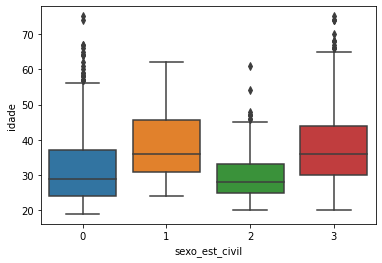

In [ ]:
sns.boxplot(x='sexo_est_civil', y='idade', data=data)
plt.show()

No Brasil, os modelos de créditos são fiscalizados e regulamentados pelo Banco Central e existem diversas regras que precisam ser seguidas e existem informações que não podem ser associadas ao modelo. São elas:
*   Origem social e étnica 
*   Condições de saúde
*   Informação genética
*   Orientação sexual
*   Convicções políticas, religiosas e filosóficas.



In [ ]:
#categorias da variavel 'sexo_est_civil'

#male : divorced/separated = 1
#female : divorced/separated/married = 2
#male : single = 3
#male : married/widowed = 4
#female : single = 5

#criando a variavel 'sexo'

## 1 = mulher
## 0 = homem

#criando a variavel 'estado_civil'
## 1 = solteira
## 0 = casada/divorciada/viúva

dic_sexo = {2:1, 5:1, 1:0, 3:0, 4:0}
dic_est_civil = {3:1, 5:1, 1:0, 2:0, 4:0}

data['sexo'] = data['sexo_est_civil'].map(dic_sexo)
data['estado_civil'] = data['sexo_est_civil'].map(dic_est_civil)

data.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro,sexo,estado_civil
0,0,1,6,1,4,1169,4,0,4,3,...,67,1,1,2,1,1,1,1,0.0,1.0
1,1,2,48,3,4,5951,1,2,2,0,...,22,1,1,1,1,1,0,1,NaN,NaN
2,0,3,12,1,0,2096,1,3,2,3,...,49,1,1,1,3,2,0,1,0.0,1.0
3,0,1,42,3,7,7882,1,3,2,3,...,45,1,0,1,1,2,0,1,0.0,1.0
4,1,1,24,2,2,4870,1,2,3,3,...,53,1,0,2,1,2,0,1,0.0,1.0


In [ ]:
#funcao para retirar colunas da base de dados

colunas_retiradas = ['sexo_est_civil', 'sexo']
base_dados = data.drop(columns=colunas_retiradas)
base_dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,outros_fiadores,...,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro,estado_civil
0,0,1,6,1,4,1169,4,0,4,2,...,2,67,1,1,2,1,1,1,1,1.0
1,1,2,48,3,4,5951,1,2,2,2,...,2,22,1,1,1,1,1,0,1,NaN
2,0,3,12,1,0,2096,1,3,2,2,...,2,49,1,1,1,3,2,0,1,1.0
3,0,1,42,3,7,7882,1,3,2,1,...,0,45,1,0,1,1,2,0,1,1.0
4,1,1,24,2,2,4870,1,2,3,2,...,3,53,1,0,2,1,2,0,1,1.0


In [ ]:
#funcao 'roda_modelo': ajuste a validacao

def roda_modelo(base_dados, classificador):

#separando a base de modelagem e variavel resposta

    y = base_dados['default']
    x = base_dados.drop(columns='default')

#separando a base de treino e teste

    SEED = 77
    treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size=0.30, random_state = SEED)

    base_treino = treino_x.shape[0]
    base_teste = teste_x.shape[0]
    print('A base de treino tem %s elementos e a base de teste tem %s elementos.' %(base_treino, base_teste))
    print(100*'-')

#ajustamdo modelo com base de teste
    
    modelo = classificador
    modelo.fit(treino_x, treino_y)

#-------------------------------------------------------------------------------------------------------------------------------------

#matriz de confusao

    matriz_confusao = plot_confusion_matrix(modelo, teste_x, teste_y, values_format = '.3g', cmap = 'Blues')
    plt.title('Matriz de Confusao')
    plt.show

#classification report

    previsoes = modelo.predict(teste_x)

    print('\nClassification Report:')
    print(classification_report(teste_y, previsoes))

#curva ROC  e AUC

    print(100*'-')
    prob_previsao = modelo.predict_proba(teste_x)[:,1]
   
    tfp, tvp, limite = roc_curve(teste_y, prob_previsao)
    print('roc_auc:', roc_auc_score(teste_y, prob_previsao))
    
    plt.subplots(1, figsize=(5,5))
    plt.title('Curva ROC')
    plt.plot(tfp, tvp)
    plt.plot([0, 1], ls="--", c = 'red') #plotando linha pontilhada guia para regressao aleatoria
    plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green') #plotando linha pontilhada guia para regressao perfeita
    plt.ylabel('Sensibilidade')
    plt.xlabel('Especificidade')
    plt.show() 

    return modelo, matriz_confusao

In [ ]:
data = data.reset_index()

In [ ]:
roda_modelo(base_dados, LogisticRegression(max_iter=1000))

A base de treino tem 700 elementos e a base de teste tem 300 elementos.
----------------------------------------------------------------------------------------------------


ValueError: ignored

In [ ]:
#criando 'faixa_idade' para variavel 'idade'

## 18 - 30 = 1
## 31 - 40 = 2
## 41 - 50 = 3
## 51 - 60 = 4
## 61 - 70 = 5
## 71 - 80 = 6

data['faixa_idade'] = pd.cut(x = data['idade'], bins=[18, 30, 40, 50, 60, 70, 80], labels = [1, 2, 3, 4, 5, 6])
data.head()

In [ ]:
#criando 'faixa_prazo_emprestimo' para variavel 'prazo_emprestimo_meses'

## 01 - 12 = 1
## 13 - 24 = 2
## 25 - 36 = 3
## 37 - 48 = 4
## 49 - 60 = 5
## 61 - 72 = 6


data['faixa_prazo_emprestimo'] = pd.cut(x = data['prazo_emprestimo_meses'], bins=[1, 12, 24, 36, 48, 60, 72], labels = [1, 2, 3, 4, 5, 6])
data.head()

In [ ]:
#criando 'faixa_valor_emprestimo' para variavel 'valor_emprestimo'

## 1 - 1000 = 1
## 1001 - 2000 = 2
## 2001 - 3000 = 3
## 3001 - 4000 = 4
## 4001 - 5000 = 5
## 5001 - 6000 = 6
## 6001 - 7000 = 7
## 7001 - 8000 = 8
## 8001 - 9000 = 9
## 9001 - 10000 = 10
## 10001 - 11000 = 11
## 11001 - 12000 = 12
## 12001 - 13000 = 13
## 13001 - 14000 = 14
## 14001 - 15000 = 15
## 15001 - 16000 = 16
## 16001 - 17000 = 17
## 17001 - 18000 = 18
## 18001 - 19000 = 19
## 19001 - 20000 = 20

data['faixa_valor_emprestimo'] = pd.cut(x = dados['valor_emprestimo'], bins=[1, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000, 19000, 20000], 
                                         labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])
data.head()

In [ ]:
#funcao para retirar colunas da base de dados

colunas_retiradas = ['sexo_est_civil', 'sexo', 'idade', 'prazo_emprestimo_meses', 'valor_emprestimo']
base_dados = data.drop(columns=colunas_retiradas)
base_dados.head()

In [ ]:
#roda novamente o modelo
roda_modelo(base_dados, LogisticRegression(max_iter=1000))

In [ ]:
colunas_retiradas = ['sexo_est_civil', 'sexo', 'idade', 'prazo_emprestimo_meses', 'valor_emprestimo']
base_dados = data.drop(columns=colunas_retiradas)
base_dados.head()

In [ ]:
#treinar modelo com a base inteira

modelo = LogisticRegression(max_iter=1000)
y = base_dados['default']
x= base_dados.drop(columns = 'default')
modelo.fit(x,y)